In [154]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def mandelbrot():
    max_iterations = 100
    z_num = 60000 # needs to be divisible by 2/3 and produce a perfect square

    zi = np.zeros(z_num, dtype=complex)
    iterations = np.zeros(z_num, dtype=int)
    
    mandelbrot_map = lambda c: lambda z: z**2 + c
    
    q_p_ratio = 2/3
    p_num = int(np.sqrt(z_num / q_p_ratio))
    q_num = int(q_p_ratio * p_num)
    
    c = [p + q * 1j for q in np.linspace(-1, 1, q_num)
                    for p in np.linspace(-2, 1, p_num)]
    
    for i in range(max_iterations):
        mask = np.abs(zi) < 2
        
        zi[mask] = (zi ** 2 + c)[mask]
        zi[np.logical_not(mask)] = 2
        iterations[mask] = i + 1

    # p is y axis, q is x axis
    image = iterations.reshape(q_num, p_num)
        
    fig, ax = plt.subplots(figsize=(8, 12))
    ax.imshow(image, cmap=plt.cm.get_cmap('magma_r'))

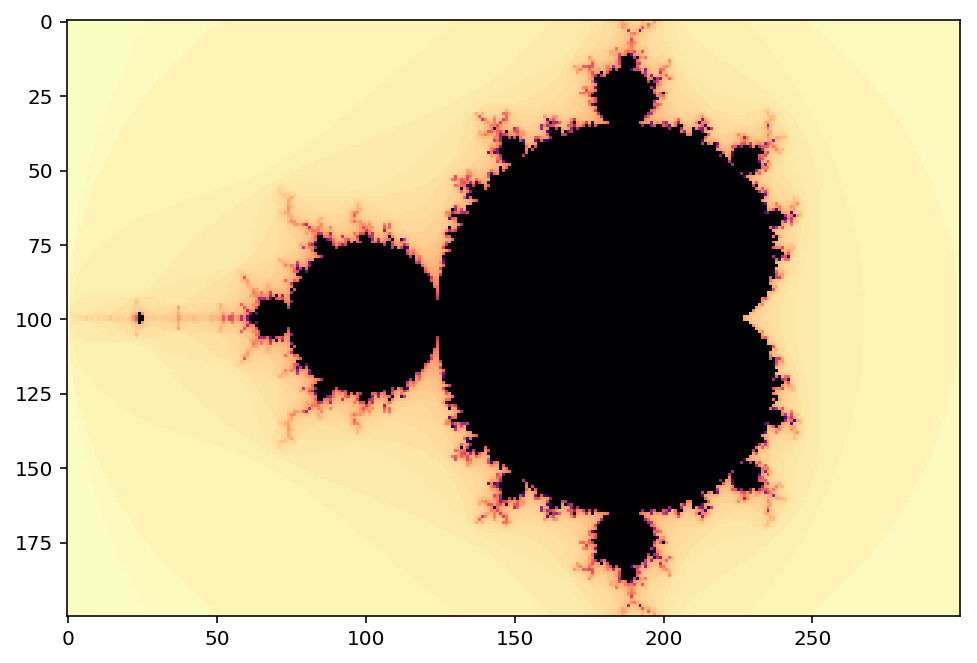

In [155]:
mandelbrot()

# np.array([1, 2, 3, 4, 5, 6]).reshape(2, 3)
# np.array([y + str(x) for y in ['a', 'b', 'c'] for x in range(4)]).reshape(3, 4)

In [168]:
def julia(c):
    max_iterations = 100
    radius = 0.5 * (1 + np.sqrt(1 + 4 * np.abs(c)))
    
    map_fn = lambda z: z**2 + c

    p_num = 500
    q_num = 500
    ratio = p_num / q_num
    
    z_num = p_num * q_num
    
    zi = np.array([p + q * 1j for q in np.linspace(-1.3, 1.3, q_num)
                              for p in np.linspace(-1.3, 1.3, p_num)])
    
    iterations = np.zeros(z_num, dtype=int)
    
    for i in range(max_iterations):
        mask = np.abs(zi) < radius
        
        zi[mask] = (zi ** 2 + c)[mask]
        zi[np.logical_not(mask)] = radius
        iterations[mask] = i + 1
    
    image = iterations.reshape(q_num, p_num)
    
    fig, ax = plt.subplots(figsize=(8 * ratio, 8))    
    ax.imshow(image, cmap=plt.cm.get_cmap('magma_r'))

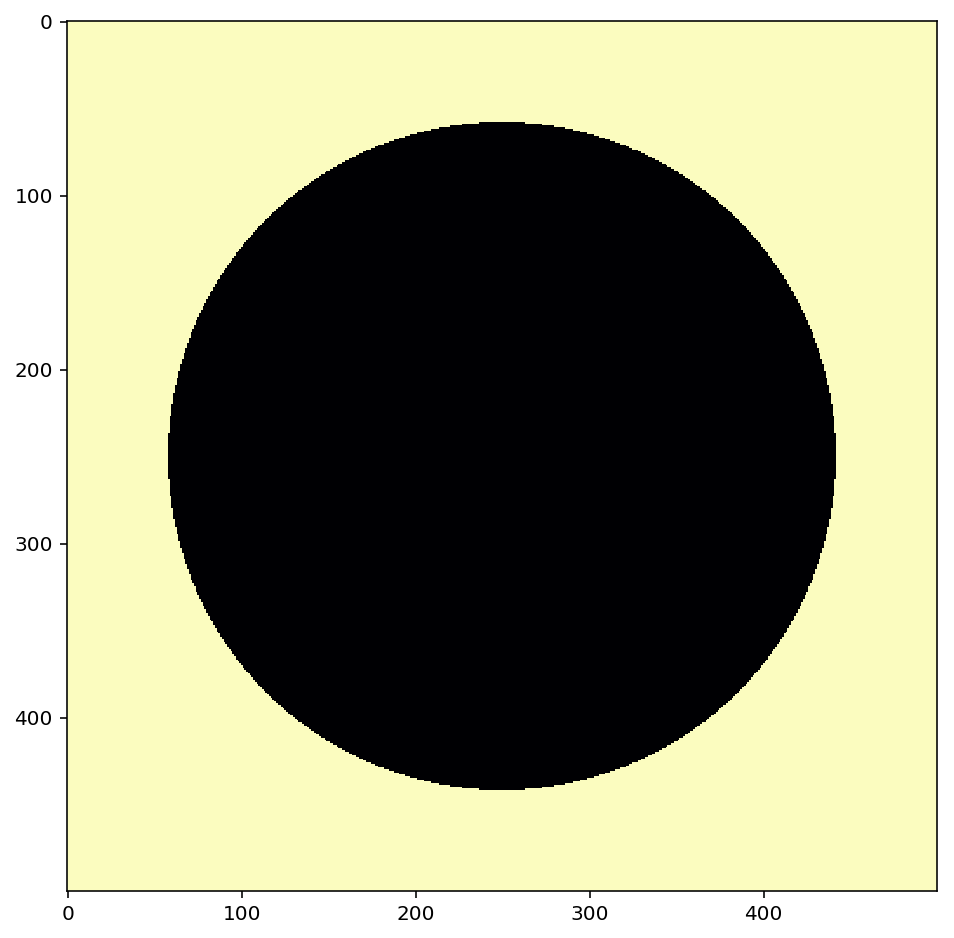

In [169]:
julia(0)

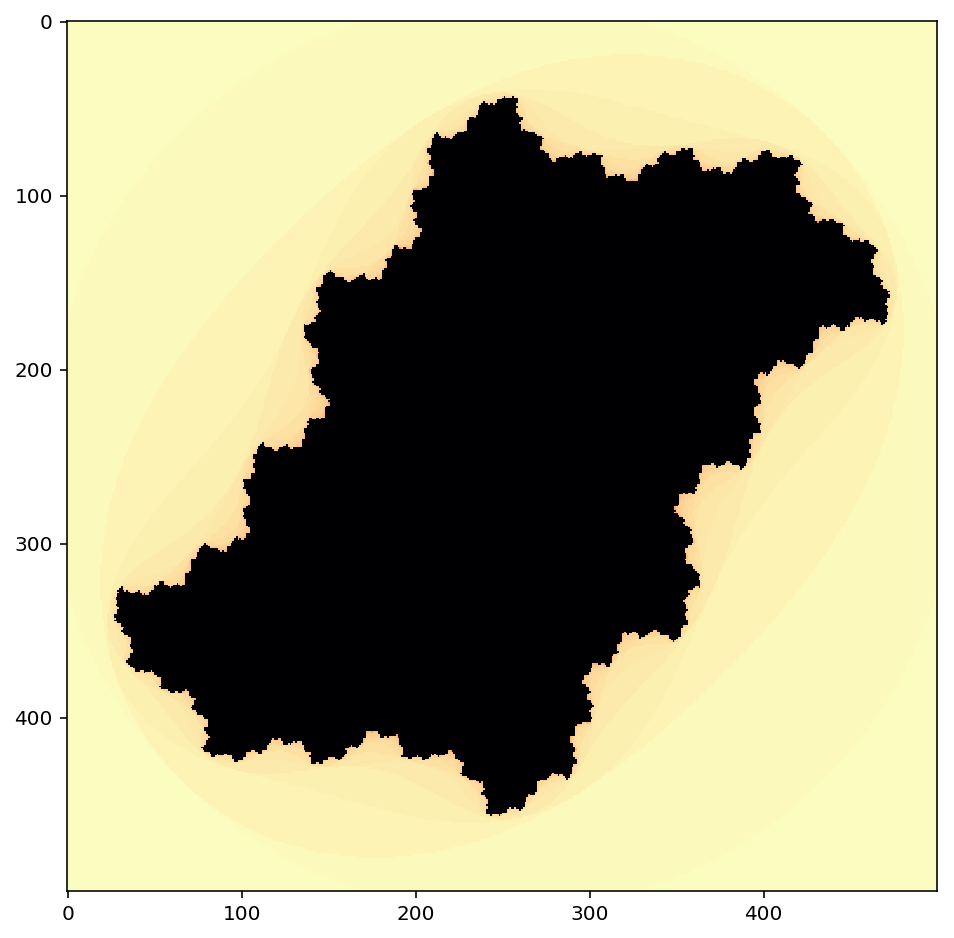

In [170]:
julia(0.5j)

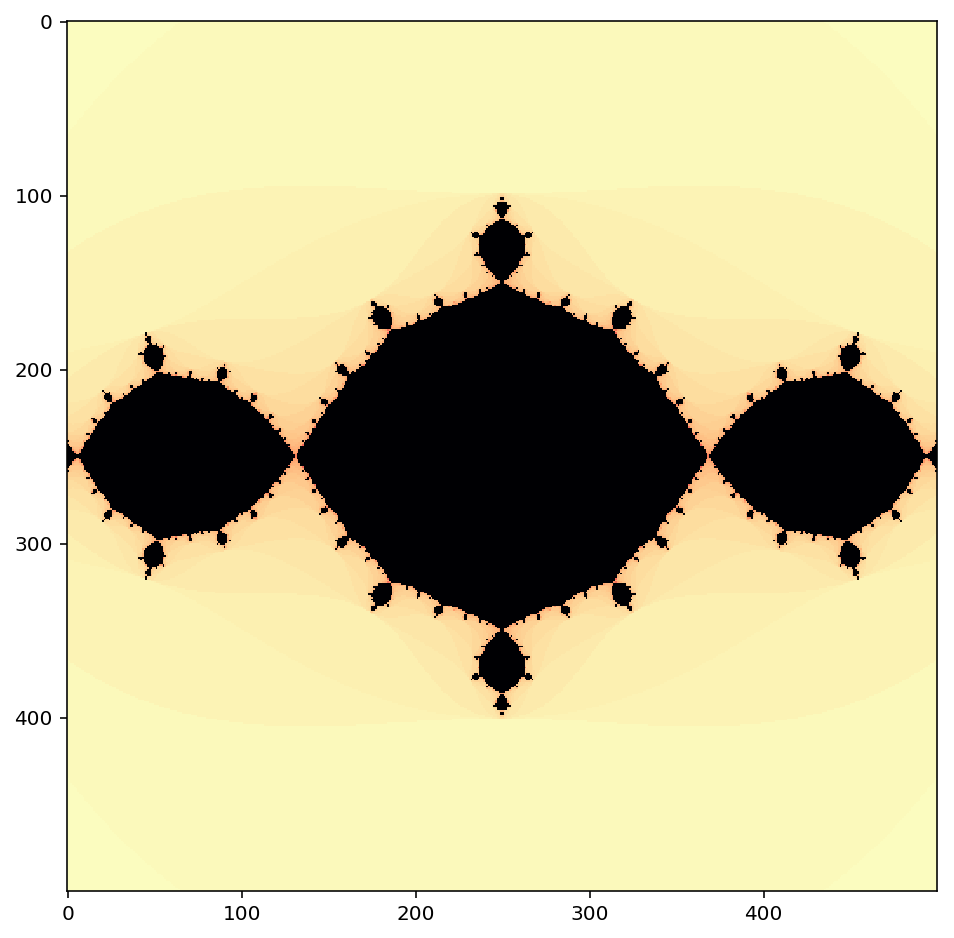

In [171]:
julia(-1)

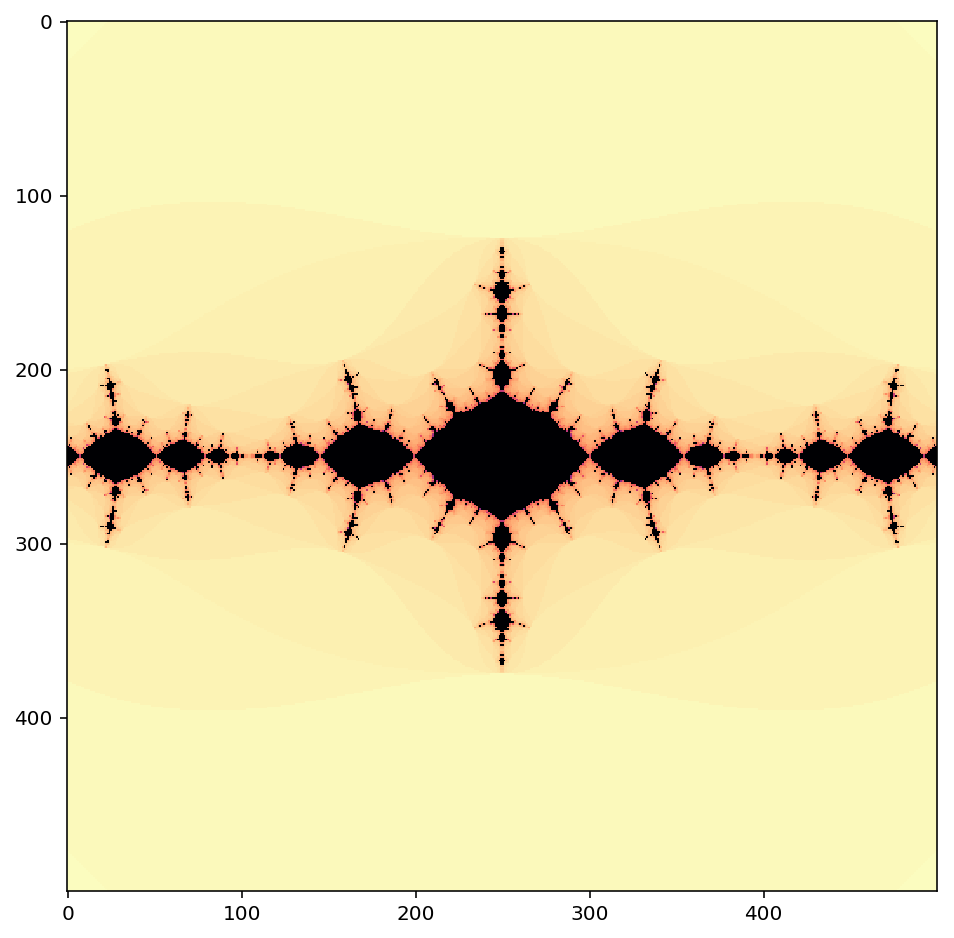

In [172]:
julia(-1.33)

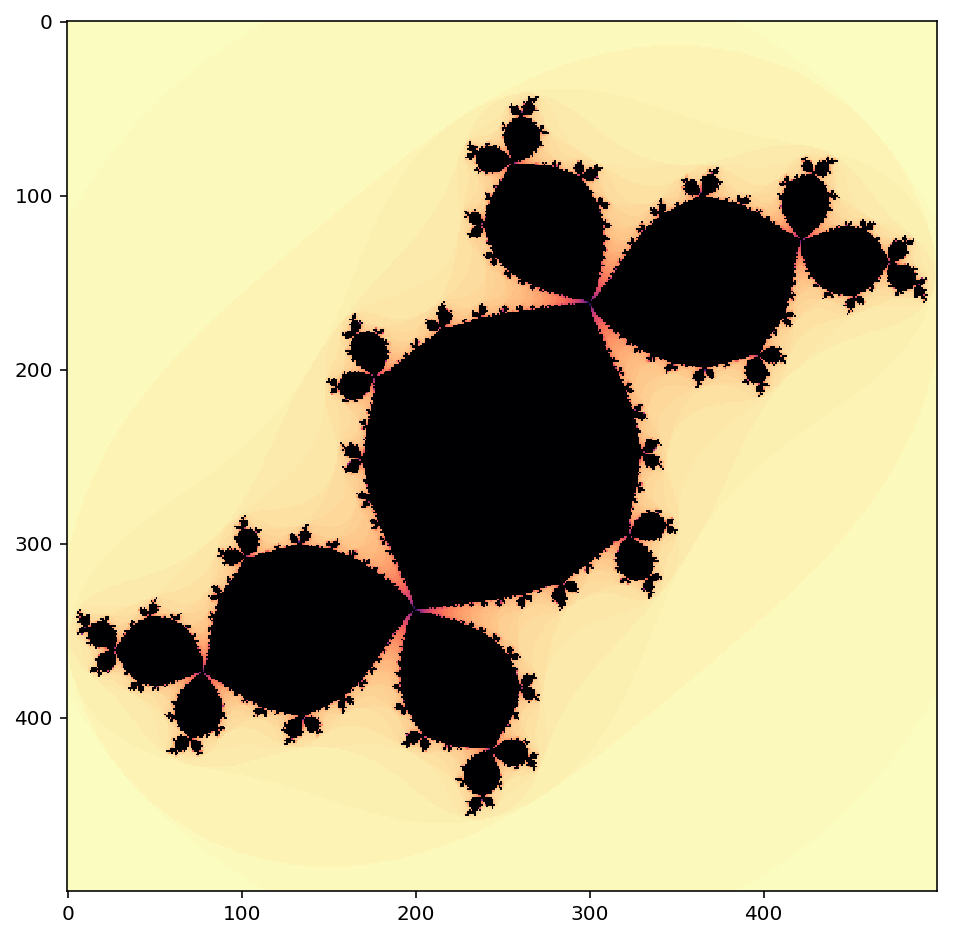

In [173]:
julia(-.12 + 0.7j)

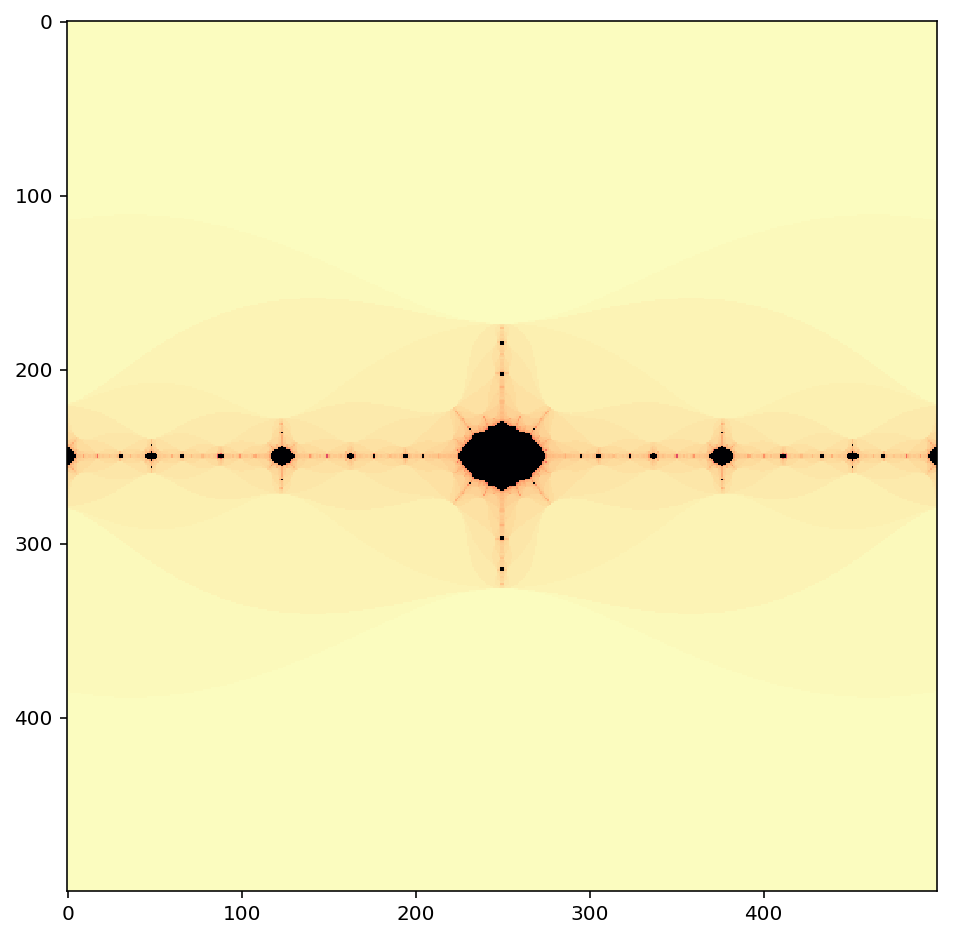

In [174]:
julia(-1.76)

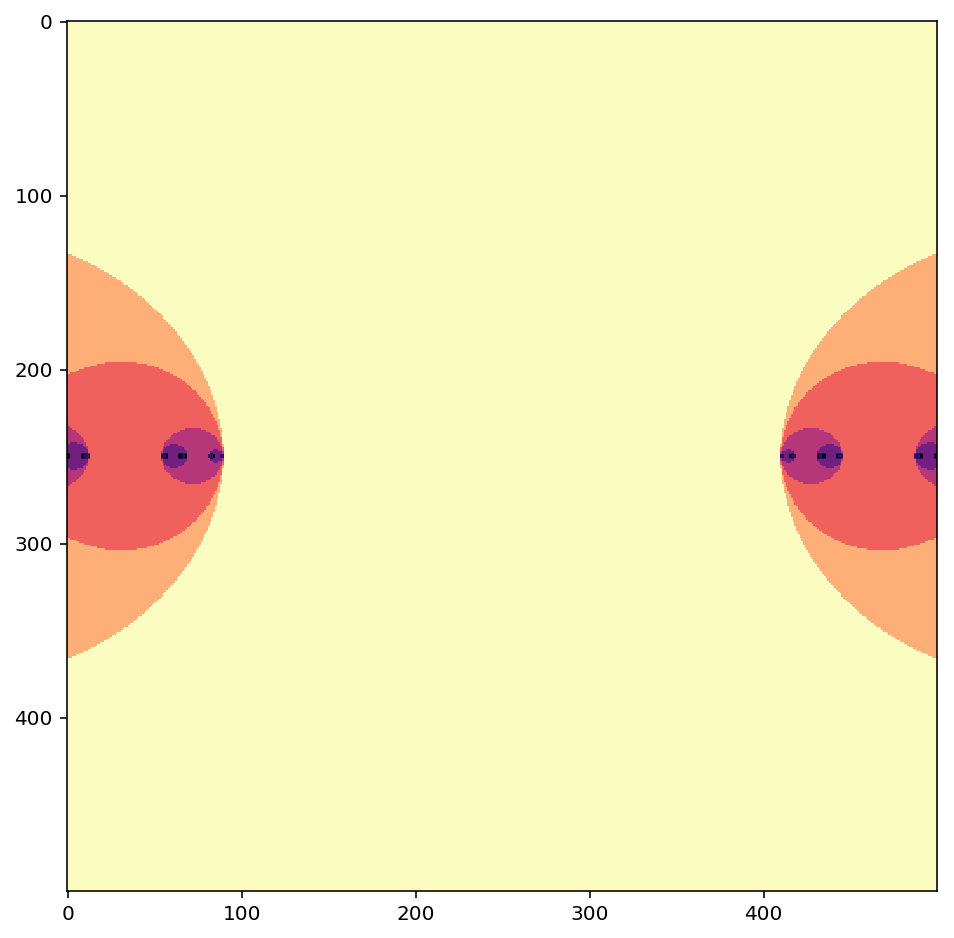

In [175]:
julia(-3)